In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [4]:
df= xr.open_dataset('snap.cdf')
df

<xarray.Dataset> Size: 508MB
Dimensions:  (x: 252, y: 252, z: 20, Time: 10)
Coordinates:
  * x        (x) float64 2kB 0.0 992.1 1.984e+03 ... 2.47e+05 2.48e+05 2.49e+05
  * y        (y) float64 2kB 0.0 992.1 1.984e+03 ... 2.47e+05 2.48e+05 2.49e+05
  * z        (z) float64 160B 0.0 100.0 200.0 300.0 ... 1.7e+03 1.8e+03 1.9e+03
  * Time     (Time) float64 80B 0.0 8.64e+04 1.728e+05 ... 6.912e+05 7.776e+05
Data variables:
    u        (Time, z, y, x) float64 102MB ...
    v        (Time, z, y, x) float64 102MB ...
    w        (Time, z, y, x) float64 102MB ...
    b        (Time, z, y, x) float64 102MB ...
    p        (Time, z, y, x) float64 102MB ...
Attributes:
    dx:       992.063492063492
    dy:       992.063492063492
    dz:       100.0
    N0:       0.0029999999242136255
    f0:       9.999999747378752e-05
    Ro:       1.0
    dsqr:     1.0

In [6]:
fig = plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 10}) 

ax0 = fig.add_subplot(121, projection='3d')
ax0.set_box_aspect([4, 2, 1])

speed = np.sqrt(df.u[0,:,:,:].values**2+df.v[0,:,:,:].values**2)
y_loc=0
xx,yy=np.meshgrid(df.x[:].values,df.y[y_loc:].values)
cset = ax0.contourf(xx/1000, yy/1000, speed[-1,y_loc:,:], cmap='RdBu_r',offset=-2000,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.6)
cset = ax0.contourf(xx/1000, yy/1000, speed[0,y_loc:,:], cmap='RdBu_r',offset=0,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.5)
ax0.set(xlim=[0, df.x[-1].values/1000], ylim=[df.y[y_loc].values/1000, df.y[-1].values/1000], zlim=[-df.z[-1].values, df.z[0].values])
# Set the camera position
ax0.view_init(elev=26, azim=-80)

ax0.set_xlabel('x [km]')
ax0.set_ylabel('y [km]')
ax0.set_zlabel('z [km]')

ax0.set_zticks([-2e3,-1e3,0])
ax0.set_zticklabels([-2,-1,0])
ax0.set_title('Speed at time='+str(df.Time[0].values/(60*60))+'h', y=0.8)
plt.colorbar(cset,ax=ax0, shrink=0.3, location = 'right', anchor=(0.5, 0.5), ticks=[0,0.5,1], label = r'$ms^{-1}$')
plt.show()

In [7]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 10}) 

ax0 = fig.add_subplot(111, projection='3d')
ax0.set_box_aspect([4, 2, 1])

speed = np.sqrt(df.u[0,:,:,:].values**2+df.v[0,:,:,:].values**2)
y_loc=0
xx,yy=np.meshgrid(df.x[:].values,df.y[y_loc:].values)
cset1 = ax0.contourf(xx/1000, yy/1000, speed[-1,y_loc:,:], cmap='RdBu_r',offset=-2000,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.6)
cset2 = ax0.contourf(xx/1000, yy/1000, speed[0,y_loc:,:], cmap='RdBu_r',offset=0,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.5)
ax0.set(xlim=[0, df.x[-1].values/1000], ylim=[df.y[y_loc].values/1000, df.y[-1].values/1000], zlim=[-df.z[-1].values, df.z[0].values])
# Set the camera position
ax0.view_init(elev=26, azim=-80)

def animate(t):
    ax0.clear()
    speed = np.sqrt(df.u[t,:,:,:].values**2+df.v[t,:,:,:].values**2)
    cset1 = ax0.contourf(xx/1000, yy/1000, speed[-1,y_loc:,:], cmap='RdBu_r',offset=-2000,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.6)
    cset2 = ax0.contourf(xx/1000, yy/1000, speed[0,y_loc:,:], cmap='RdBu_r',offset=0,zdir='z',levels=np.linspace(-0.,1,30), alpha=0.5)
    ax0.set_zlim(-2000,0)
    ax0.set_xlabel('x [km]')
    ax0.set_ylabel('y [km]')
    ax0.set_zlabel('z [km]')
    ax0.set_zticks([-2e3,-1e3,0])
    ax0.set_zticklabels([-2,-1,0])
    ax0.set_title('Speed at time='+str(df.Time[t].values/(60*60*24))+' days', y=0.8)

    return(cset1,cset2)

plt.colorbar(cset1,ax=ax0, shrink=0.3, location = 'right', anchor=(0.5, 0.5), ticks=[0,0.5,1], label = r'$ms^{-1}$')

anim = animation.FuncAnimation(fig,animate, frames = 10, interval = 300)
HTML(anim.to_jshtml())


# Exercise

Please try to do an animation where you have the fuild as a cube cut at the center of the y-axis (that is at y_index = 126). Plot the vorticity $\eta(x,y,z) = \partial_{x}V(x,y,z)-\partial_yU(x,y,z)$

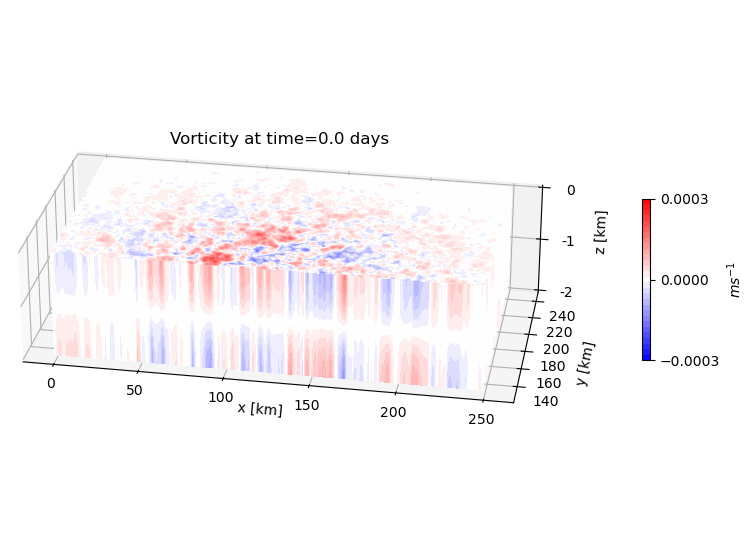

In [8]:
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 10}) 

ax0 = fig.add_subplot(111, projection='3d')
ax0.set_box_aspect([4, 2, 1])
# Set the camera position
ax0.view_init(elev=26, azim=-80)

vorticity = df.v[0,:,:,:].differentiate('x').values-df.u[0,:,:,:].differentiate('y').values
y_loc=126
xx1,yy1=np.meshgrid(df.x[:].values,df.y[y_loc:].values)
cset1 = ax0.contourf(xx1/1000, yy1/1000, vorticity[0,y_loc:,:], cmap='bwr',offset=0,zdir='z',levels=np.linspace(-3e-4,3e-4,30))

xx2,zz2=np.meshgrid(df.x[:].values,df.z[:].values)
cset2 = ax0.contourf(xx2/1000, vorticity[:,y_loc,:], -zz2, cmap='bwr',offset=df.y[y_loc].values/1e3,zdir='y',levels=np.linspace(-3e-4,3e-4,30))

yy3,zz3=np.meshgrid(df.y[y_loc:].values,df.z[:].values)
cset3 = ax0.contourf(vorticity[:,y_loc:,-1],yy3/1e3, -zz3, cmap='bwr',offset=df.x[-1].values/1e3,zdir='x',levels=np.linspace(-3e-4,3e-4,30))

def animate(t):
    ax0.clear()
    vorticity = df.v[t,:,:,:].differentiate('x').values-df.u[t,:,:,:].differentiate('y').values
    cset1 = ax0.contourf(xx1/1000, yy1/1000, vorticity[0,y_loc:,:], cmap='bwr',offset=0,zdir='z',levels=np.linspace(-3e-4,3e-4,30))
    cset2 = ax0.contourf(xx2/1000, vorticity[:,y_loc,:], -zz2, cmap='bwr',offset=df.y[y_loc].values/1e3,zdir='y',levels=np.linspace(-3e-4,3e-4,30))
    cset3 = ax0.contourf(vorticity[:,y_loc:,-1],yy3/1e3, -zz3, cmap='bwr',offset=df.x[-1].values/1e3,zdir='x',levels=np.linspace(-3e-4,3e-4,30))
    ax0.set_ylim(df.y[y_loc].values/1e3,df.y[-1].values/1e3)
    ax0.set_zlim(-2000,0)
    ax0.set_xlabel('x [km]')
    ax0.set_ylabel('y [km]')
    ax0.set_zlabel('z [km]')
    ax0.set_zticks([-2e3,-1e3,0])
    ax0.set_zticklabels([-2,-1,0])
    ax0.set_title('Vorticity at time='+str(df.Time[t].values/(60*60*24))+' days', y=0.8)

    return(cset1,cset2)

plt.colorbar(cset1,ax=ax0, shrink=0.3, location = 'right', anchor=(0.5, 0.5), ticks=[-3e-4,0,3e-4], label = r'$ms^{-1}$')

anim = animation.FuncAnimation(fig,animate, frames = 10, interval = 300)
HTML(anim.to_jshtml())
